# Florida Coastal Construction Control Line permits

This is a Jupyter notebook that explores CCCL [permit data](http://geodata.dep.state.fl.us/datasets/coastal-construction-control-line-cccl-permits) from the Florida Department of Environmental Protection that dates back from 1970 to October 2017. 

Florida's [CCCL program](http://floridadep.gov/water/coastal-construction-control-line) sets a regulatory line meant to protect the state's beaches from harmful development. The program requires builders to prove their projects will not cause harm to the beaches or natural habitats. 

Once a project is approved by the state DEP, developers also often have to gain approval from the cities and counties that have jurisdiction over the planned sites.

The goal of this notebook is to analyze yearly trends in the amount of CCCL projects approved by the Florida DEP.

### Load in the data

We'll pull in the data downloaded from the state's website and check out some info on the columns.

In [12]:
import pandas as pd
%matplotlib inline

cccl_permits = pd.read_csv("CCCL_Permits_10-29-2017.csv", low_memory=False)

Then check the "STATUS" column and count up the number of each entry.

In [2]:
cccl_permits.STATUS.value_counts().reset_index()

,index,STATUS
0,Issued,26213
1,Closed,19006
2,Denied,28
3,Reactivated,11


In [13]:
issued_permits = cccl_permits[cccl_permits.STATUS == 'Issued']

In [4]:
cccl_issued = issued_permits[issued_permits.PERM_TYPE_ID == 'CCCL']

In [14]:
len(cccl_issued)

2111

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

cccl_issued.ISSUE_DATE = pd.to_datetime(cccl_issued.ISSUE_DATE)

In [6]:
def get_cycle(dt):
    if dt.year % 1 == 0:
        return dt.year
    else:
        return dt.year +1

In [7]:
cccl_issued['issue_year'] = cccl_issued.ISSUE_DATE.apply(get_cycle)

In [8]:
by_year = cccl_issued.groupby("issue_year").size().reset_index()

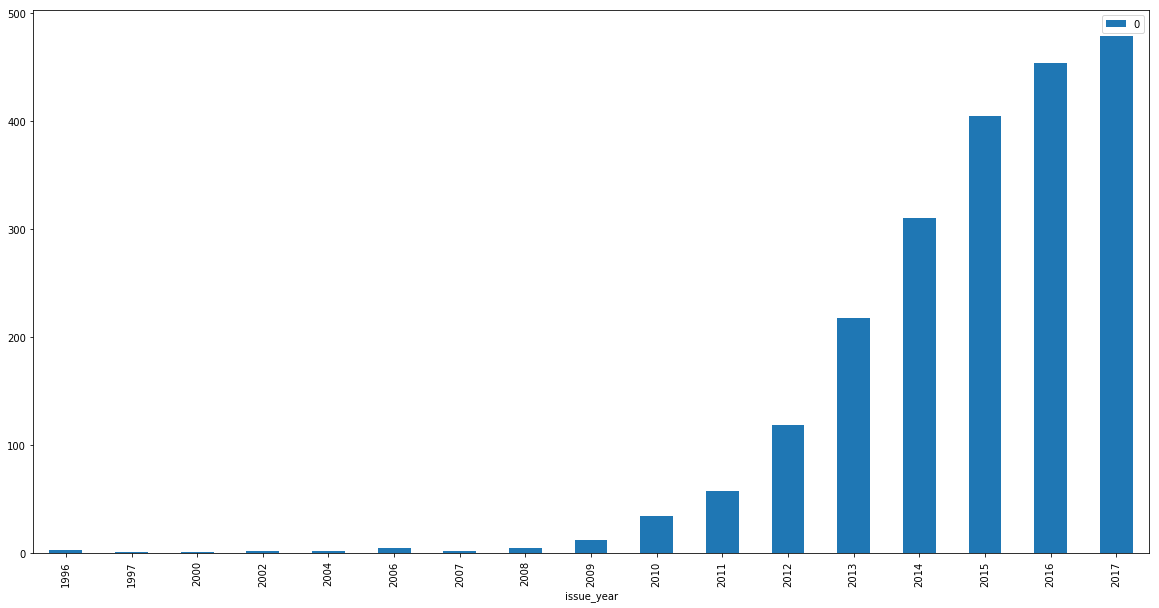

In [11]:
by_year.set_index("issue_year").plot.bar(figsize=(20, 10))